In [96]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

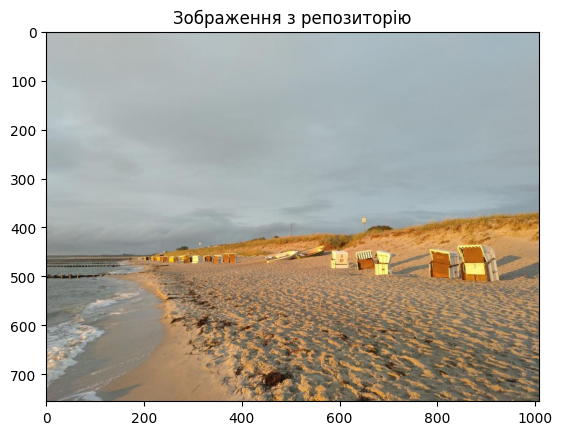

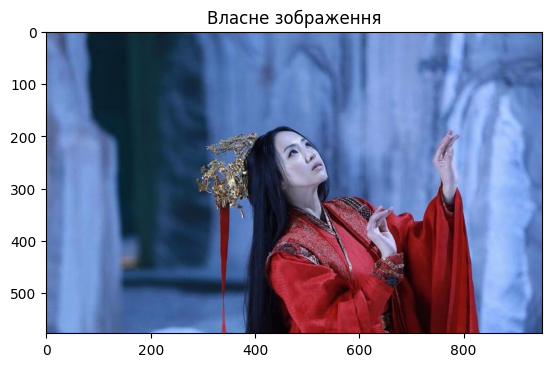

In [97]:
img = cv2.imread('../lab2_Verenchuk_Stanislav/data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('../lab2_Verenchuk_Stanislav/data/my_test_img.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Зображення з репозиторію')
plt.show()

plt.imshow(img2)
plt.title('Власне зображення')
plt.show()

# **White patch**

## Для зображення з репозиторію

(<Axes: >, <matplotlib.image.AxesImage at 0x2105dd3ad80>)

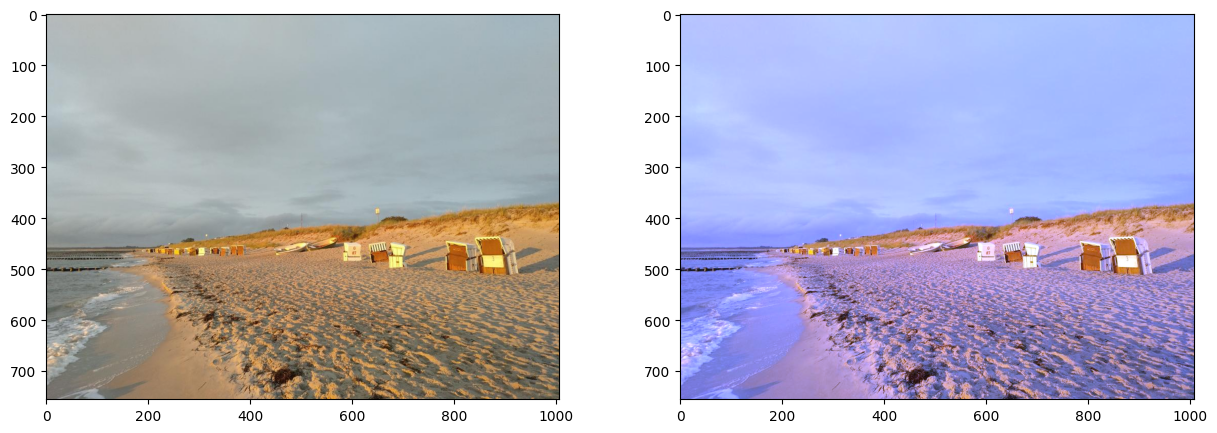

In [98]:
row, col = 485, 864
white = img[row, col, :]
coeffs = 255.0/white

balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

balanced = balanced/255
balanced[balanced > 1] = 1

new_img = balanced

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### **Висновок**
Після застосування алгоритму White Patch до зображення було усунуто ефект жовтого або помаранчевого кольору, завдяки чому дошка на зображенні стала білою, як це є насправді. Однак саме зображення набуло блакитного та фіолетового відтінків через зміну балансу кольорів в результаті корекції білого. Посилення холодних тонів, робить сцену більш нейтральною за кольоропередачею.

## Для власного зображення

(<Axes: >, <matplotlib.image.AxesImage at 0x2106b01a1e0>)

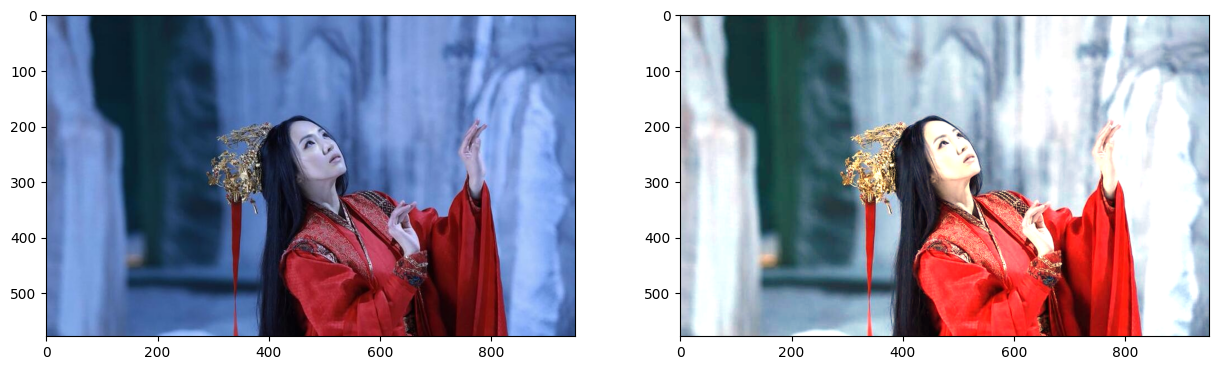

In [99]:
row, col = 280, 840
white = img2[row, col, :]
coeffs = 255.0/white

wp_balanced2 = np.zeros_like(img2, dtype=np.float32)
for channel in range(3):
    wp_balanced2[..., channel] = img2[..., channel] * coeffs[channel]

wp_balanced2 = wp_balanced2/255
wp_balanced2[wp_balanced2 > 1] = 1

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(img2)
plt.subplot(122), plt.imshow(wp_balanced2)

### **Висновок**
Алгоритм White Patch у цьому прикладі зменшив загальний «холодний» відтінок. Проте, деякі світлі зони (зокрема, на обличчі, в частині фону) стали занадто яскравими. Це свідчить про «пересвічення», тобто втрату деталей у найсвітліших ділянках. Така ситуація виникає, оскільки алгоритм сильно підсилює яскравість білих або близьких до білого тонів.

# Gray world

## Для зображення з репозиторію

(<Axes: >, <matplotlib.image.AxesImage at 0x210723d68d0>)

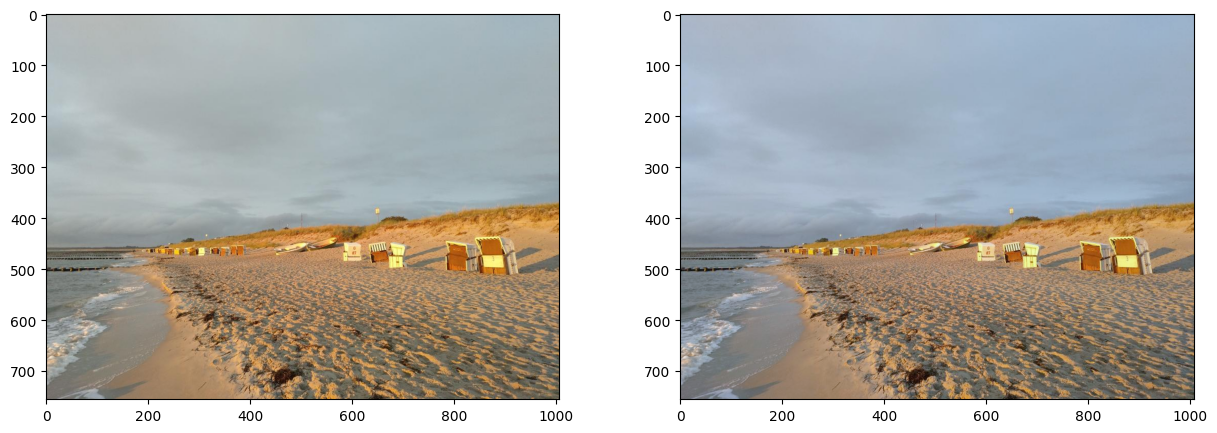

In [100]:
r, g, b = cv2.split(img)

# Compute the mean values for all three colour channels (red, green, blue)
r_avg = cv2.mean(r)[0]
g_avg = cv2.mean(g)[0]
b_avg = cv2.mean(b)[0]

avg = (r_avg + g_avg + b_avg) / 3

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = avg / r_avg
kg = avg / g_avg
kb = avg / b_avg

r = (r * kr).clip(0,255)
g = (g * kg).clip(0,255)
b = (b * kb).clip(0,255)

# Apply color balancing and generate the balanced image
balanced = cv2.merge([r, g, b]).astype(np.uint8)

# Show the original and the balanced image side by side
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### **Висновок**
Алгоритм Gray World у цьому прикладі зменшив теплий (жовто-помаранчевий) відтінок, надавши сцені більш нейтрального вигляду. Пісок та інші об’єкти стали менш насиченими теплими тонами, а загальний колорит змістився в бік прохолоднішої гами. Однак, Gray World спричинив надмірне «охолодження» неба на зображенні.

## Для власного зображення

(<Axes: >, <matplotlib.image.AxesImage at 0x21073e7e750>)

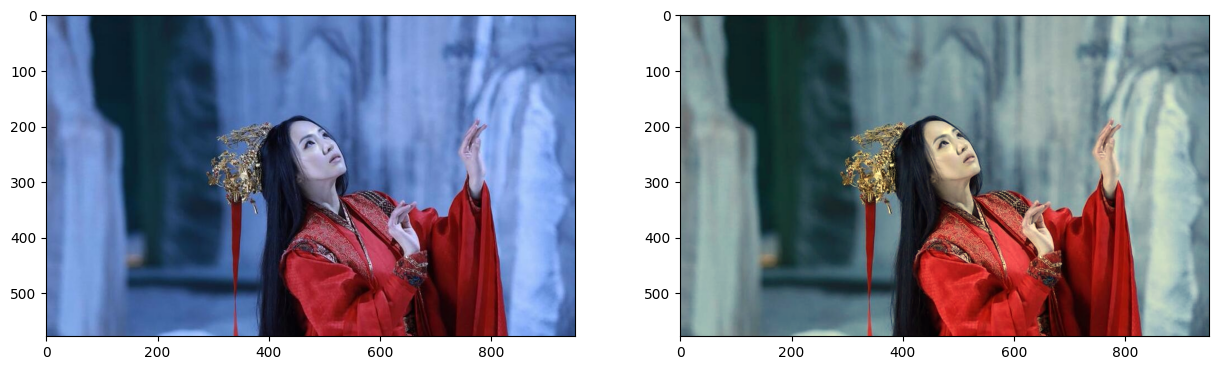

In [101]:
r, g, b = cv2.split(img2)

# Compute the mean values for all three colour channels (red, green, blue)
r_avg = cv2.mean(r)[0]
g_avg = cv2.mean(g)[0]
b_avg = cv2.mean(b)[0]

avg = (r_avg + g_avg + b_avg) / 3

# Compute the coefficients kr, kg, kb
kr = avg / r_avg
kg = avg / g_avg
kb = avg / b_avg

r = (r * kr).clip(0,255)
g = (g * kg).clip(0,255)
b = (b * kb).clip(0,255)

# Apply color balancing and generate the balanced image
gray_balanced2 = cv2.merge([r, g, b]).astype(np.uint8)

# Show the original and the balanced image side by side
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(img2)
plt.subplot(122), plt.imshow(gray_balanced2)

### **Висновок**
Алгоритм Gray World у цьому прикладі суттєво зменшив холодний (синій) відтінок, зсунувши кольори в напрямку більш теплої гами. Завдяки цьому червоне вбрання має насиченіший колір, але шкіра на обличчі має занадто теплий відтінок. На зображенні присутні великі площі одного кольору (переважання синіх у фоні), Gray World спричинив надмірне «нагрівання» зображення. 

# Scale by max

## Для зображення з репозиторію

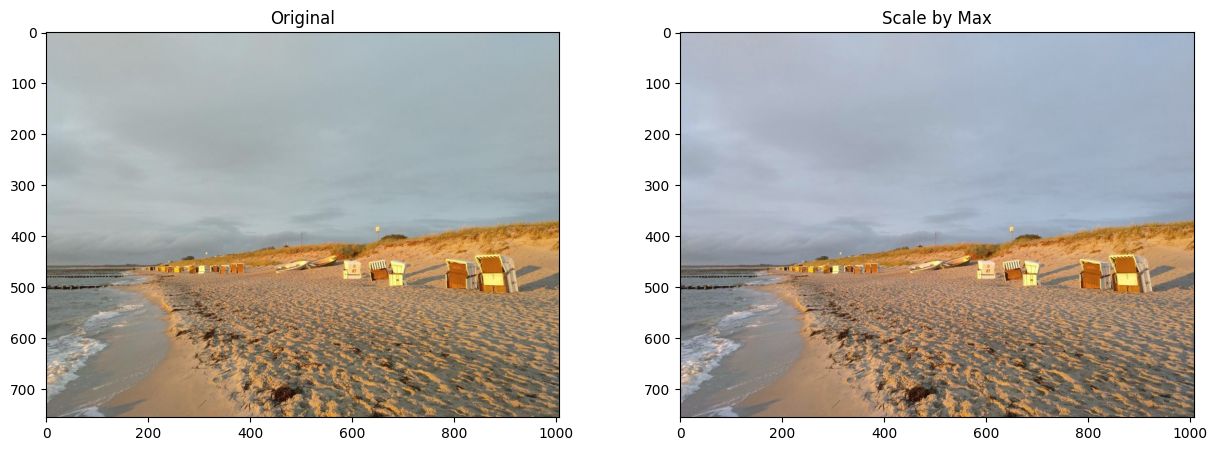

In [102]:
r, g, b = cv2.split(img)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)

# Масштабуємо кольорові канали
r = (r / max_r * 255).clip(0, 255).astype(np.uint8)
g = (g / max_g * 255).clip(0, 255).astype(np.uint8)
b = (b / max_b * 255).clip(0, 255).astype(np.uint8)

# Apply scale-by-max balancing and generate the balanced image
sbm_balanced = cv2.merge([r, g, b])

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(sbm_balanced), plt.title('Scale by Max')
plt.show()

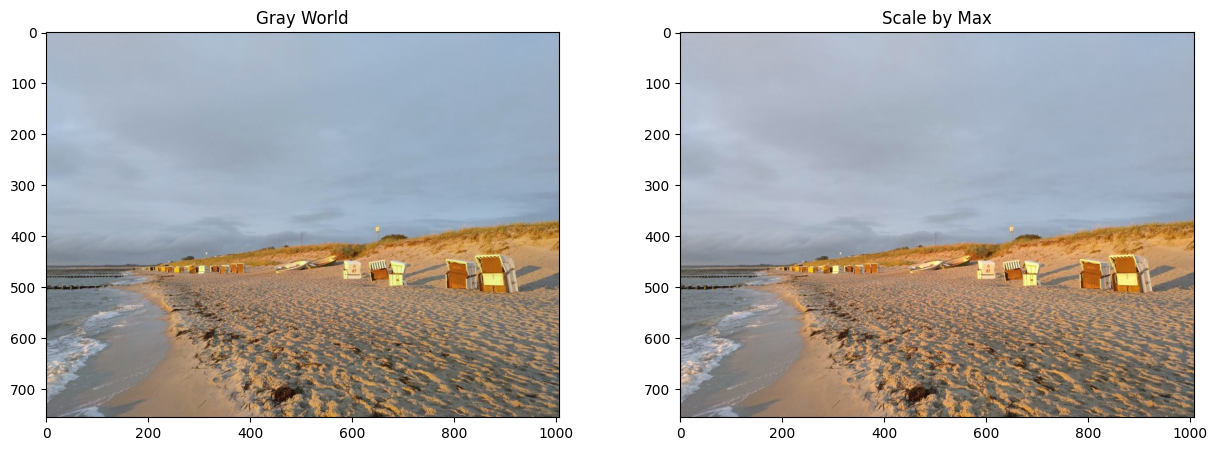

In [103]:
# Порівняння результатів Gray World та Scale by Max
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(balanced), plt.title('Gray World')
plt.subplot(122), plt.imshow(sbm_balanced), plt.title('Scale by Max')
plt.show()

### **Висновок**
Алгоритм Scale by Max в цьому прикладі забезпечив збереження більш природних відтінків неба порівняно з Gray World, уникаючи надмірного «охолодження». Загалом зображення після Scale by Max має подібний баланс білого до Gray World, проте кольори залишаються ближчими до оригінальних, особливо у світлих та напівтональних ділянках (як-от небо). Такий результат свідчить про те, що Scale by Max може бути більш «обережним» у корекції, коли на фото присутні великі зони з домінуванням певного кольору, зменшуючи ризик небажаних зсувів у холодні чи теплі відтінки.

## Власне зображення

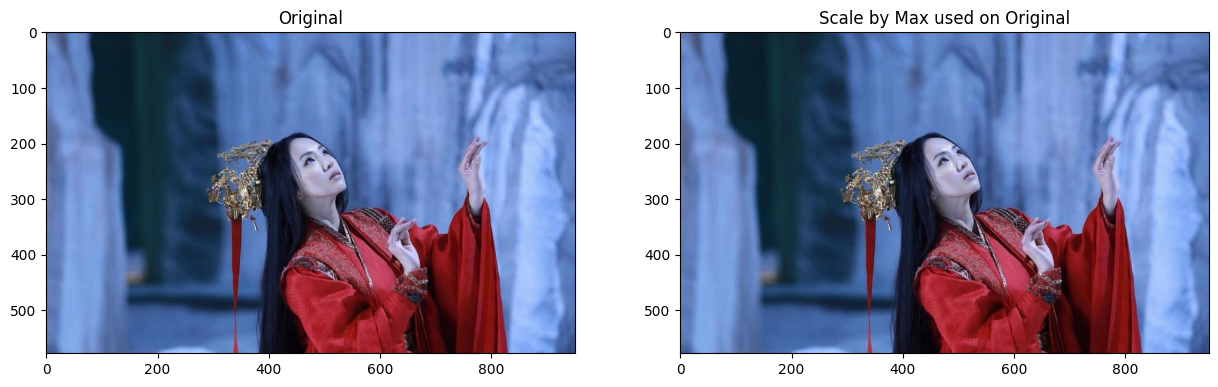

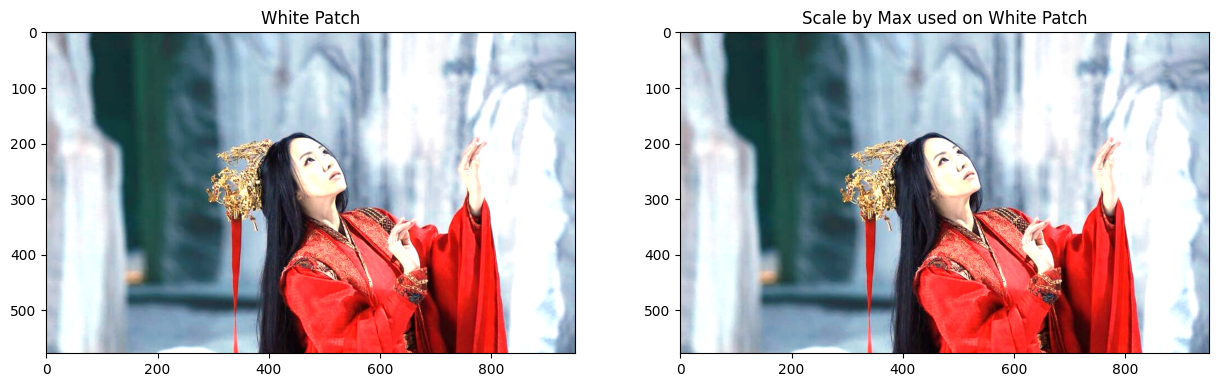

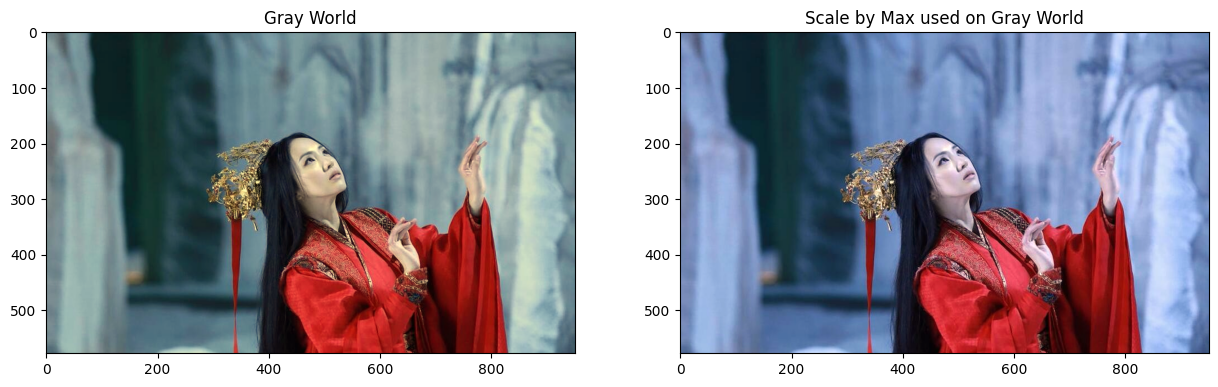

In [104]:
r, g, b = cv2.split(img2)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)

# Масштабуємо кольорові канали
r = (r / max_r * 255).clip(0, 255).astype(np.uint8)
g = (g / max_g * 255).clip(0, 255).astype(np.uint8)
b = (b / max_b * 255).clip(0, 255).astype(np.uint8)

# Apply scale-by-max balancing and generate the balanced image
sbm_balanced2 = cv2.merge([r, g, b])

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(img2), plt.title('Original')
plt.subplot(122), plt.imshow(sbm_balanced2), plt.title('Scale by Max used on Original')
plt.show()

#--------------------------------------------------------------------------------------

r, g, b = cv2.split(wp_balanced2)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)

# Масштабуємо кольорові канали
r = (r / max_r * 255).clip(0, 255).astype(np.uint8)
g = (g / max_g * 255).clip(0, 255).astype(np.uint8)
b = (b / max_b * 255).clip(0, 255).astype(np.uint8)

# Apply scale-by-max balancing and generate the balanced image
sbm_balanced2 = cv2.merge([r, g, b])

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(wp_balanced2), plt.title('White Patch')
plt.subplot(122), plt.imshow(sbm_balanced2), plt.title('Scale by Max used on White Patch')
plt.show()

#--------------------------------------------------------------------------------------

r, g, b = cv2.split(gray_balanced2)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)

# Масштабуємо кольорові канали
r = (r / max_r * 255).clip(0, 255).astype(np.uint8)
g = (g / max_g * 255).clip(0, 255).astype(np.uint8)
b = (b / max_b * 255).clip(0, 255).astype(np.uint8)

# Apply scale-by-max balancing and generate the balanced image
sbm_balanced2 = cv2.merge([r, g, b])

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(gray_balanced2), plt.title('Gray World')
plt.subplot(122), plt.imshow(sbm_balanced2), plt.title('Scale by Max used on Gray World')
plt.show()

### **Висновок**
Тут було прийнято рішення використати алгоритм Scale by Max для оригінального зображення та результатів попередніх алгоритмів.
- У результаті застосування алгоритму Scale by Max для оригінального зображення не спостерігається змін.
- Для зображення, яке попередньо оброблене алгоритмом White Patch також у результаті Scale by Max не показує істотних змін.
- Попередньо оброблене зображення алгоритмом Gray World у результаті застосування Scale by Max показує більш природні відтінки. Червоне вбрання має "оптимально" насичений колір та відтінок. У загальному зображення виглядає більш нейтрального та правильно.

## **Висновки**
1. Які результати дають різні піксельні операції на різних зображеннях?
- White Patch часто «вибілює» найсвітліші ділянки, тому може ефективно усувати теплі або холодні відтінки. Проте, якщо реальний білий колір відсутній чи неправильно визначений, зображення може набути небажаних синьо-фіолетових відтінків чи «пересвічених» ділянок.
- Gray World зазвичай добре справляється з яскраво вираженим кольоровим «засиненням» або «пожовтінням», вирівнюючи середній колір сцени до нейтрального. Однак при великій кількості однотипних відтінків зображення може стати надмірно «охолодженим» чи «нагрітим».
- Scale by Max менш агресивно коригує баланс білого, орієнтуючись на максимальні значення в кожному каналі. Завдяки цьому часто дає «пом’якшений» результат, без сильних зсувів у холодну чи теплу гаму, але може зберігати незначні відтінки, якщо в оригіналі вони були виражені.

2. Чому так відбувається?
Кожен із методів базується на різних припущеннях про «правильний» білий або середній сірий колір:
- White Patch припускає, що найсвітліша точка на зображенні має бути білою й коригує кольори, виходячи з цього.
- Gray World вважає, що середнє значення каналів (R, G, B) має бути однаковим (тобто «сірим»).
- Scale by Max масштабує кожен колірний канал за максимальною яскравістю, вважаючи, що найяскравіша ділянка для кожного каналу має бути «біла».
Через різні підходи до вирівнювання кольорів результати можуть суттєво відрізнятися навіть для одного й того ж зображення.

3. На яких зображеннях, на вашу думку, яку піксельну операцію краще застосовувати?
- White Patch доцільно застосовувати, якщо на фото справді присутні яскраві білі ділянки (наприклад, білий одяг чи сніг), і ви впевнені, що це реальний білий колір. Тоді алгоритм дає змогу доволі точно скоригувати колірну температуру.
- Gray World пасуватиме зображенням із помірним, але очевидним колірним зсувом, коли важливо швидко привести загальний відтінок до нейтрального, і немає великих ділянок однотонного фону.
- Scale by Max добре працює, коли ви хочете отримати більш «м’яку» корекцію, без різких змін у кольорах, або коли White Patch чи Gray World призводять до небажаного спотворення (надмірного «охолодження»/«нагрівання»). Це надійний метод у випадках, коли немає очевидного білого або середнього сірого в кадрі, але потрібно підправити загальний баланс.